In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn

In [106]:
heart_disease = pd.read_csv("heart-disease.csv")

In [107]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
X= heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split




In [110]:


# create x and y

x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create model
clf = RandomForestClassifier(n_estimators = 100)

np.random.seed(42)

# fit model on features and labels
clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

# Evaluate model using evaluation functions

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1_score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 80.33%
Precision: 0.8285714285714286
Recall: 0.8285714285714286
F1_score: 0.8285714285714286


# Improving a model

In [111]:
clf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### make 3 sets
* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'


In [112]:
def evaluate_preds(y_true, y_preds):

    ### Performs evaluation comparison on ytrue and ypreds

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = { "Accuracy": round(accuracy, 2),
    "Rrecision" : round(precision, 2),
    "Recall" : round(recall, 2),
    "F1" : round(f1, 2)}

    print(f"Accuracy: {accuracy *100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1_score: {f1:2f}")

    return metric_dict

In [113]:
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target",axis = 1)
y = heart_disease_shuffled["target"]

###split data into train, validation, and test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

clf_model_1 = RandomForestClassifier(n_estimators = 100)
clf_model_2 = RandomForestClassifier(n_estimators = 250)
clf_model_3 = RandomForestClassifier(n_estimators = 100, max_depth = 50)

In [114]:
len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [115]:
clf_model_1.fit(x_train, y_train)

### make baseline predictions
y_preds = clf_model_1.predict(x_valid)

###Evaluate classifier on validation set
clf_model_1_metrics = evaluate_preds(y_valid, y_preds)



print ("    ")
print("    ")

###Evaliating classifier on tuned hyperparameters
clf_model_2.fit(x_train, y_train)
y_preds2 = clf_model_2.predict(x_valid)
clf_model_2_metrics = evaluate_preds(y_valid, y_preds2)

print ("    ")
print("    ")

###Evaliating classifier on tuned hyperparameters
clf_model_3.fit(x_train, y_train)
y_preds3 = clf_model_3.predict(x_valid)
clf_model_3_metrics = evaluate_preds(y_valid, y_preds3)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1_score: 0.846154
    
    
Accuracy: 84.44%
Precision: 0.85
Recall: 0.88
F1_score: 0.862745
    
    
Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1_score: 0.846154


In [116]:
from sklearn.model_selection import RandomizedSearchCV

grid = { "n_estimators" : [10,100,200,250,500,1200], "max_depth" : [None, 5, 10,20,30], "max_features": ["auto", "sqrt"], "min_samples_split": [2,4,6], "min_samples_leaf" : [1,2,4]}

np.random.seed(42)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf_model = RandomForestClassifier(n_jobs = 1)

rs_clf_model = RandomizedSearchCV( estimator = model, param_distributions = grid, n_iter = 10, cv = 5, verbose = 2)

rs_clf_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

c:\Users\Anwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Anwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Anwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Anwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 250, 500,
                                                         1200]},
                   verbose=2)

In [117]:
rs_clf_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [118]:
## Make predictions via rs_model

rs_y_preds = rs_clf_model.predict(x_test)

### Evaluate predictions of rs_model

rs_clf_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.76
Recall: 0.89
F1_score: 0.819672


<Axes: >

<Figure size 1000x1000 with 0 Axes>

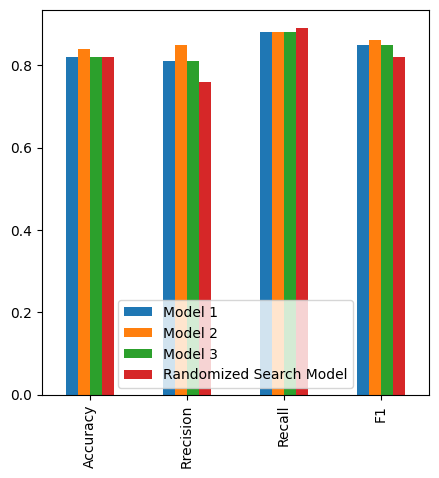

In [119]:
compare_clf_metrics = pd.DataFrame({"Model 1" : clf_model_1_metrics, "Model 2" : clf_model_2_metrics, "Model 3" : clf_model_3_metrics, "Randomized Search Model" : rs_clf_metrics})
plt.figure(figsize = (10,10))
compare_clf_metrics.plot.bar(figsize = (5,5))

Random Forest Regressor Models

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# create x and y

x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# create model
rfr_model = RandomForestRegressor(n_estimators = 100)

np.random.seed(42)

# fit model
rfr_model.fit(x_train, y_train)

rfr_y_preds = rfr_model.predict(x_test)




In [122]:
grid = { "n_estimators" : [10,100,200,250,500,1200], "max_depth" : [None, 5, 10,20,30], "max_features": ["auto", "sqrt"], "min_samples_split": [2,4,6], "min_samples_leaf" : [1,2,4]}

np.random.seed(42)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

rfr_model = RandomForestRegressor(n_jobs = 1)

rs_rfr_model = RandomizedSearchCV( estimator = rfr_model, param_distributions = grid, n_iter = 10, cv = 5, verbose = 2)

rs_rfr_model.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

c:\Users\Anwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Anwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Anwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Anwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 250, 500,
                                                         1200]},
                   verbose=2)

In [123]:
rs_rfr_preds = rs_rfr_model.predict(x_test)

In [124]:
def evaluate_rfr_preds(y_true, y_preds):

    ### Performs evaluation comparison on ytrue and ypreds

    
    r2score = r2_score(y_true, y_preds)
    mean_abs_error = mean_absolute_error(y_true, y_preds)
    mean_sqr_error = mean_squared_error(y_true, y_preds)
    metric_dict = { "R2 Score": round(r2score, 2),
    "MAE" : round(mean_abs_error, 2),
    "MSE" : round(mean_sqr_error, 2)}
    

    print(f"R2 Score: {r2score *100:.2f}%")
    print(f"MAE: {mean_abs_error:.2f}")
    print(f"MSE: {mean_sqr_error:.2f}")

    return metric_dict


rs_rfr_model_metrics = evaluate_rfr_preds(y_test, rs_rfr_preds)
rfr_model_1_metrics = evaluate_rfr_preds(y_test, rfr_y_preds)

R2 Score: 58.34%
MAE: 0.25
MSE: 0.10
R2 Score: -47.83%
MAE: 0.50
MSE: 0.37


<Axes: >

<Figure size 1000x1000 with 0 Axes>

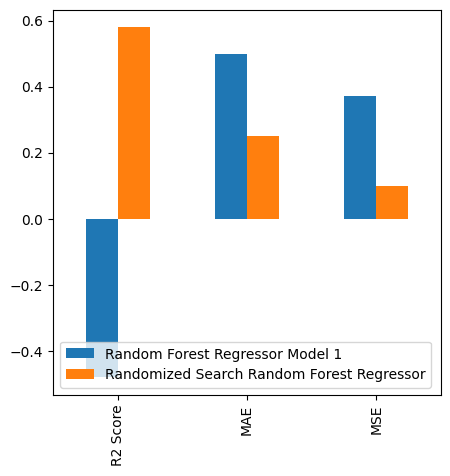

In [125]:
compare_rfr_metrics = pd.DataFrame({"Random Forest Regressor Model 1" : rfr_model_1_metrics, "Randomized Search Random Forest Regressor" : rs_rfr_model_metrics})

plt.figure(figsize = (10,10))
compare_rfr_metrics.plot.bar(figsize = (5,5))